In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("titanic.csv", usecols = ['pclass', 'survived','name','sex', 'age', 'fare'])

In [3]:
dataset

,pclass,survived,name,sex,age,fare
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,151.5500
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500
...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,14.4542
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,7.2250
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,7.8750


In [4]:
# Take the important features only
df = dataset[['survived','pclass','name', 'sex','fare']]

In [5]:
# For simplification porpuse rename the users name
user_name = df['name']

In [6]:
df['user']=df.index +1

In [7]:
df = df.drop(['name'], axis=1)

In [8]:
df.head()

,survived,pclass,sex,fare,user
0,1.0,1.0,female,211.3375,1
1,1.0,1.0,male,151.5500,2
2,0.0,1.0,female,151.5500,3
3,0.0,1.0,male,151.5500,4
4,0.0,1.0,female,151.5500,5


In [9]:
# Check missing values
df.isnull().sum()

survived    1
pclass      1
sex         1
fare        2
user        0
dtype: int64

In [10]:
# drop missing values
df = df.dropna()

In [11]:
df.isnull().sum()

survived    0
pclass      0
sex         0
fare        0
user        0
dtype: int64

In [12]:
len(df)

1308

In [13]:
df.head()

,survived,pclass,sex,fare,user
0,1.0,1.0,female,211.3375,1
1,1.0,1.0,male,151.5500,2
2,0.0,1.0,female,151.5500,3
3,0.0,1.0,male,151.5500,4
4,0.0,1.0,female,151.5500,5


In [14]:
# Statistical discription
stats = df.describe()

In [15]:
import matplotlib.pyplot as plt


# Univariate analysis EDA

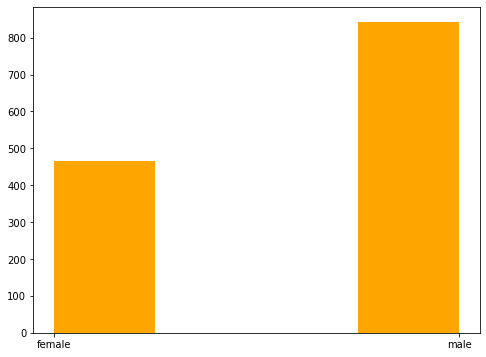

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df['sex'],bins=4,color='orange')
plt.show()

In [17]:
survived = []
for i in df.survived:
    if i == 0:
        survived.append('no')
    else:
        survived.append('yes')

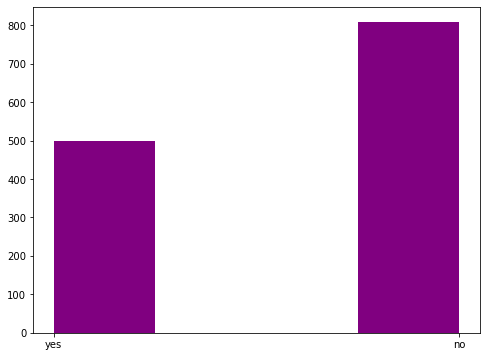

In [18]:
plt.figure(figsize=(8,6))
plt.hist(survived,bins=4,color='purple')
plt.show()

In [19]:
pd.unique(df.pclass)

array([1., 2., 3.])

In [20]:
pclass = []
for i in df.pclass:
    if i == 1.:
        pclass.append('1st')
    elif i ==  2:
        pclass.append('2nd')
    else:
        pclass.append('3rd')

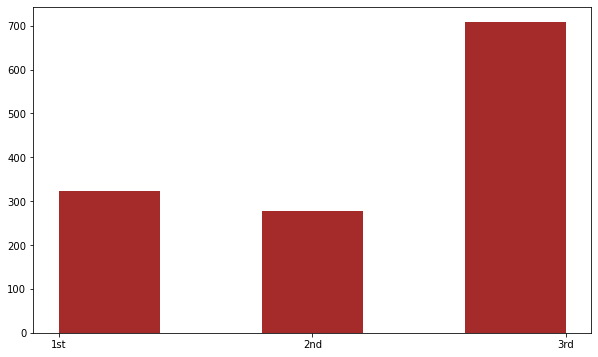

In [21]:
plt.figure(figsize=(10,6))
plt.hist(pclass,bins=5,color='brown')
plt.show()

# Bivariate analysis EDA

In [22]:
df.head()

,survived,pclass,sex,fare,user
0,1.0,1.0,female,211.3375,1
1,1.0,1.0,male,151.5500,2
2,0.0,1.0,female,151.5500,3
3,0.0,1.0,male,151.5500,4
4,0.0,1.0,female,151.5500,5


In [23]:
import seaborn as sns

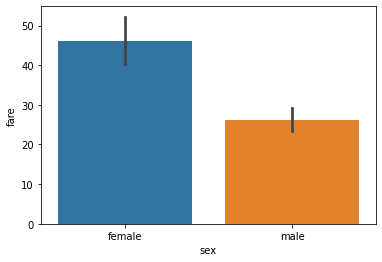

In [24]:
# Sex vs Fare
sns.barplot(df['sex'], df['fare'],data=df)
plt.show()

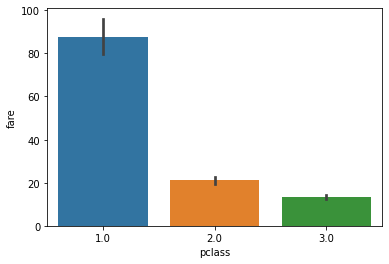

In [25]:
# Pclass vs Fare
sns.barplot(df['pclass'], df['fare'],data=df)
plt.show()

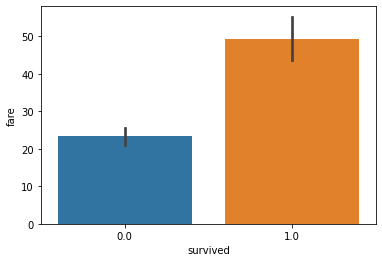

In [26]:
# survived vs Fare
sns.barplot(df['survived'], df['fare'],data=df)
# sns.countplot(df['survived'],data=df)
plt.show()

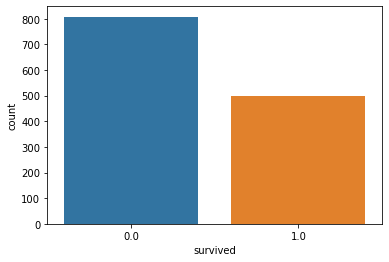

In [27]:
sns.countplot(df['survived'],data=df)
plt.show()

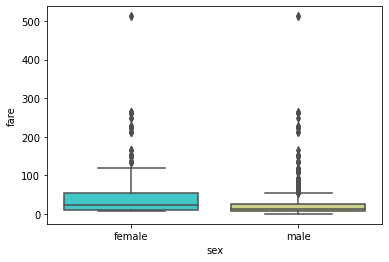

In [28]:
sns.boxplot(x=df['sex'],y=df['fare'],data=df,palette='rainbow')
plt.show()

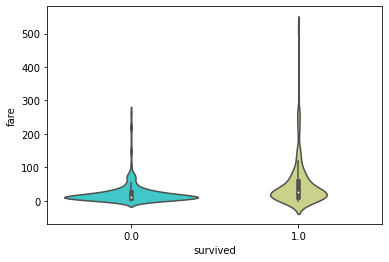

In [29]:
sns.violinplot(df['survived'], df['fare'], data=df,palette='rainbow')
plt.show()

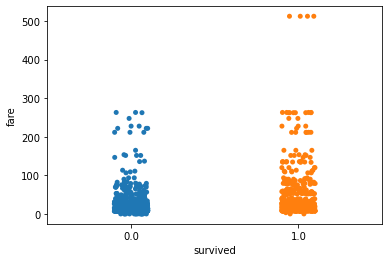

In [30]:
sns.stripplot(df['survived'], df['fare'], data=df)
plt.show()

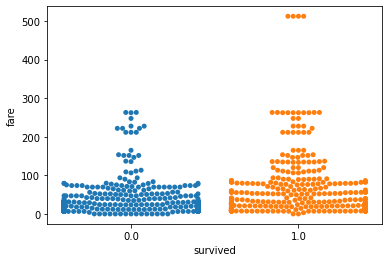

In [31]:
sns.swarmplot(df['survived'],df['fare'],data = df)
plt.show()

In [32]:
# Heatmap
df.dtypes

survived    float64
pclass      float64
sex          object
fare        float64
user          int64
dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
labeler = LabelEncoder()

In [35]:
df['sex'] = labeler.fit_transform(df['sex'])

In [36]:
df_temp = df.drop(['user','fare'],axis=1)

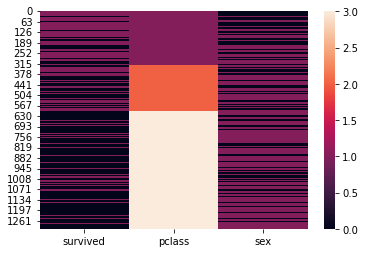

In [37]:
sns.heatmap(df_temp)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1308 non-null   float64
 1   pclass    1308 non-null   float64
 2   sex       1308 non-null   int32  
 3   fare      1308 non-null   float64
 4   user      1308 non-null   int64  
dtypes: float64(3), int32(1), int64(1)
memory usage: 88.5 KB


In [39]:
df.head()

,survived,pclass,sex,fare,user
0,1.0,1.0,0,211.3375,1
1,1.0,1.0,1,151.5500,2
2,0.0,1.0,0,151.5500,3
3,0.0,1.0,1,151.5500,4
4,0.0,1.0,0,151.5500,5


In [40]:
df['survived'].value_counts()

0.0    808
1.0    500
Name: survived, dtype: int64

In [41]:
# Inbalanced data has to be balanced..
length = len(df['survived'])

In [42]:
not_survived = df['survived'].value_counts()[0]

In [43]:
ratio = not_survived/length

In [44]:
ratio # the ration supposed to be 0.5

0.617737003058104

# Handling inbalanced data

In [45]:
from sklearn.utils import resample

In [46]:
# Create two different dataframe of majority and minority class
df_majority = df[(df['survived'] == 0)]
df_minority = df[(df['survived'] == 1)]

In [47]:
# Upsample the minority class
df_minority_upsample = resample(df_minority,
                               replace=True,
                                #sample with replacement
                                n_samples=808,
                                random_state = 42 #reproducible results
                               )

In [48]:
# Combine majority class and upsampled minority class
df_upsampled = pd.concat([df_minority_upsample, df_majority])

In [49]:
df_upsampled

,survived,pclass,sex,fare,user
152,1.0,1.0,1,30.0000,153
1033,1.0,3.0,1,7.7750,1034
719,1.0,3.0,1,8.0500,720
502,1.0,2.0,0,19.5000,503
160,1.0,1.0,0,57.9792,161
...,...,...,...,...,...
1304,0.0,3.0,0,14.4542,1305
1305,0.0,3.0,0,14.4542,1306
1306,0.0,3.0,1,7.2250,1307
1307,0.0,3.0,1,7.2250,1308


In [50]:
len(df_upsampled)

1616

In [51]:
df_upsampled['survived'].value_counts()

1.0    808
0.0    808
Name: survived, dtype: int64

# Apply Model on unbalanced data

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
# dependent variable and independet variabale
y = df['survived'].values
x = df.drop(['survived'],axis=1).values

In [54]:
x_train,x_test ,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [55]:
lg = LogisticRegression()

In [56]:
y_train

array([0., 0., 1., ..., 0., 1., 0.])

In [57]:
lg.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred = lg.predict(x_test)

In [59]:
y_pred

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [60]:
from sklearn import metrics as met

In [61]:
accuracy = met.accuracy_score(y_pred,y_test)
f1 = met.f1_score(y_pred,y_test)
precision = met.precision_score(y_pred,y_test)
recall = met.recall_score(y_pred,y_test)

In [62]:
print(f"Accuracy: {accuracy}\nf1: {f1}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.7557251908396947
f1: 0.68
Precision: 0.6415094339622641
Recall: 0.723404255319149


In [63]:
recall

0.723404255319149

# Apply Model on balanced data

In [64]:
# dependent variable and independet variabale
y = df_upsampled['survived'].values
x = df_upsampled.drop(['survived'],axis=1).values

In [65]:
x_train,x_test ,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [66]:
lg = LogisticRegression()

In [67]:
lg.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = lg.predict(x_test)

In [69]:
accuracy = met.accuracy_score(y_pred,y_test)
f1 = met.f1_score(y_pred,y_test)
precision = met.precision_score(y_pred,y_test)
recall = met.recall_score(y_pred,y_test)

In [70]:
print(f"Accuracy: {accuracy}\nf1: {f1}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.7561728395061729
f1: 0.7627627627627628
Precision: 0.7470588235294118
Recall: 0.7791411042944786


In [71]:
import numpy as np

In [72]:
q1 = np.percentile(df_upsampled['fare'], 25)
q3 = np.percentile(df_upsampled['fare'], 75)
iqr = q3 - q1

<AxesSubplot:xlabel='fare'>

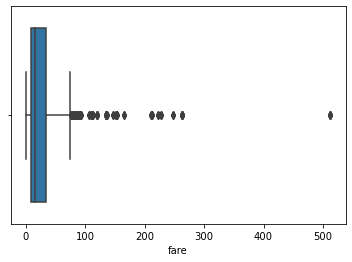

In [73]:
sns.boxplot(df_upsampled['fare'])

In [74]:
median = np.median(df_upsampled['fare'])

In [75]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
fare = df_upsampled['fare'].values
outliers = []

In [76]:
fare = fare.tolist()

In [77]:
for i in range(len(fare)):
    if fare[i]>upper_limit or fare[i]<lower_limit:
        outliers.append(fare[i])

In [78]:
median = np.median(fare)# Replace with median
for i in outliers:
    c = np.where(fare==i, 14, fare)
# print(x.dtype)

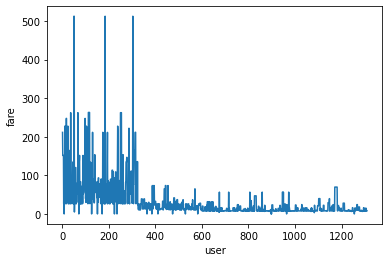

In [79]:
sns.lineplot(df['user'],df['fare'])
plt.show()

# Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [81]:
scaled_x = scale.fit_transform(x)

In [82]:
x_train,x_test ,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [83]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred = lg.predict(x_test)

In [85]:
accuracy = met.accuracy_score(y_pred,y_test)
f1 = met.f1_score(y_pred,y_test)
precision = met.precision_score(y_pred,y_test)
recall = met.recall_score(y_pred,y_test)

In [86]:
print(f"Accuracy: {accuracy}\nf1: {f1}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.7561728395061729
f1: 0.7627627627627628
Precision: 0.7470588235294118
Recall: 0.7791411042944786
